## Homework Submission

**Name:** Atul Parida  
**Student ID:** 1006184  
**Course:** 50.007 Machine Learning, Summer 2023  
**Submission:** Homework 1 - Question 3

**Instructions:** Select Run All to run full code. Make sure it's within the same folder as the dataset files.

In [1]:
# imports libraries required for ML model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('HW1_data/3/train_warfarin.csv', header=None)
validation_data = pd.read_csv('HW1_data/3/validation_warfarin.csv', header=None)
test_data = pd.read_csv('HW1_data/3/test_warfarin.csv', header=None)



# separate into features and labels
# labels: first column
# features: all other columns
train_X = train_data.iloc[:, 1:].values  # Extract features from second column onwards
train_y = train_data.iloc[:, 0].values   # Extract labels from the first column

validation_X = validation_data.iloc[:, 1:].values
validation_y = validation_data.iloc[:, 0].values

test_X = test_data.iloc[:, 1:].values
test_y = test_data.iloc[:, 0].values

[147.55949804719208, 51.07226891781562, 105.37731236047115, 40.554558169005624, 32.1011496222016, 28.224351397509604, 36.10399391305934, 28.61578446058063, 27.734380513161522, 41.08831714713133, 27.463015760315674, 27.294786939236957, 28.36096234799679, 26.808835931404328, 28.728186930560426, 27.54199091657538, 27.386378628466126, 42.849993253135956, 117.02782745287782, 39.39124125040825, 21.248437716523412, 22.903276833169198, 42.20027670675224, 21.559115289842016, 34.24218847807723, 63.27197341985869, 21.85996116823013, 53.76159382545411, 13.65572709877372, 32.20279297640818, 20.11688006157051, 18.434924104781356, 39.46592944026938, 16.239586904150148, 18.41729312217774, 41.43948159408622, 14.935033538376777, 16.86583125752623, 22.361377888745725, 19.53119095208997, 33.215272444653245, 16.920462729428394, 17.002492759906236, 30.49616179638617, 16.031983039238455, 14.357282836094782, 17.438337835037995, 13.293529936175664, 22.60531522123119, 27.040824813547662, 12.39306226122869, 11.5

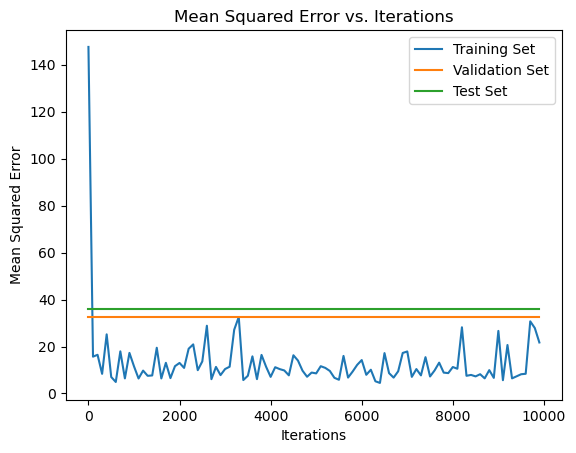

In [3]:
def stochastic_gradient_descent(X, y, learning_rate, iterations):
    n = len(X)
    weights = np.zeros(X.shape[1])  # Initialize weights with zeros
    errors = []

    for i in range(iterations):
        random_index = np.random.randint(n)  # Randomly select a data point
        x = X[random_index]
        label = y[random_index]
        prediction = np.dot(x, weights)  # Calculate the predicted value

        # Update weights
        gradient = 2 * np.dot(x.T, (prediction - label))
        weights -= learning_rate * gradient

        # Calculate mean squared error
        mse = np.mean((np.dot(X, weights) - y) ** 2)
        errors.append(mse)

    return weights, errors

learning_rate = 0.1
iterations = 10000

# run on training data
weights, errors = stochastic_gradient_descent(train_X, train_y, learning_rate, iterations)



print(errors)

# Save weights every 100 iterations
saved_weights = [weights.copy()]  # Initialize with weights after 0 iterations
saved_errors = [errors[0]]  # Initialize with error after 0 iterations

for i in range(1, iterations):
    if i % 100 == 0:
        saved_weights.append(weights.copy())
        saved_errors.append(errors[i])

plt.plot(range(0, iterations, 100), saved_errors, label='Training Set')
plt.plot(range(0, iterations, 100), [np.mean((np.dot(validation_X, w) - validation_y) ** 2) for w in saved_weights], label='Validation Set')
plt.plot(range(0, iterations, 100), [np.mean((np.dot(test_X, w) - test_y) ** 2) for w in saved_weights], label='Test Set')

plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Iterations')
plt.legend()
plt.show()